<a href="https://colab.research.google.com/github/dalexa10/Python_4_Data_Science/blob/main/collecting-organizing-analyzing-basics/collecting-organizing-analyzing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/lukeolson/mse598dm-python-data/blob/main/collecting-organizing-analyzing-basics/collecting-organizing-analyzing-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.fueleconomy.gov/feg/label/images/gaslabel.jpg" width="600px;" alt="gas prices"/>

#   **TOPIC**:  Collecting, organizing, and analyzing data

## Objectives

### Objectives

1. Identify the pieces of a Pandas dataframe for a set of data.
2. Interpret data through plotting. 
3. Apply data filtering techniques to prepare the data for analysis.
4. Organize multiple data sets for analysis.
5. Construct a comparison between two sets of data.

### Questions To Ask

1. What are the column types in your dataframe?
2. How do you plot a column of data?
3. Which data needs to be modified in your dataframe?
4. How do you plot two time series?
5. How would you correlate two series of data?

### What to hand in
1. An attempt at last portion "Your turn..."
2. Answer "Three things I learned from this example..."
    1. ...
    2. ...
    3. ...

## Highlevel topics

- Data importing and storage
- Data cleaning
- Data plotting
- Plot manipulation
- Data analysis using built-in tools

## Synopsis

You are a data scientist working for a DC think tank, and your team is studying technology and energy policy.  To prepare for an upcoming energy sumit you are studying the relationship between **US fuel prices** and **fuel efficiency**, measured in miles-per-gallon.

#### Your Task

Your goal is to identify trends in two different datasets on **US fuel prices** and **fuel efficiency**.

## Datasets

In this session two datasets will be used:
- Automotive Trends Report
    - This dataset provides **miles per gallon** on light-duty vehicles
    - https://www.epa.gov/automotive-trends/explore-automotive-trends-data
    - https://www.epa.gov/automotive-trends/about-automotive-trends-data
    - downloaded as `table_export.csv`
- Retail motor gasoline and on-highway diesel fuel prices
    - This dataset provides **fuel prices**
    - https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T09.04#/
    - (section 9.4) https://www.eia.gov/totalenergy/data/monthly/index.php
    - downlloaded as `MER_T09_04.csv`

Example
```
wget https://www.eia.gov/totalenergy/data/browser/csv.php\?tbl\=T09.04 -O T09_04.csv
```

In [1]:
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
!wget https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
!ls -lh

--2023-02-05 00:54:52--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/MER_T09_04.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 691634 (675K) [text/plain]
Saving to: ‘MER_T09_04.csv’

MER_T09_04.csv      100%[===================>] 675.42K  --.-KB/s    in 0.02s   

2023-02-05 00:54:52 (34.7 MB/s) - ‘MER_T09_04.csv’ saved [691634/691634]

--2023-02-05 00:54:53--  https://raw.githubusercontent.com/lukeolson/mse598dm-python-data/main/collecting-organizing-analyzing-basics/data/table_export.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

## 0. Getting Started

### Setting up Python

First, import a few Python packages that we'll use throught the course.  By convention these are abbreviated on import.

- `matplotlib` and the interface `matplotlib.pyplot` for plotting
- `numpy` for numerical functions and arrays
- `pandas` for data structures and analysis
- `seaborn` for additional plotting and improved figures

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

### Import data

Here we will import the data with Pandas `read_csv` function and store as a *dataframe*.  

What is a *dataframe*?  It's a storage container (provided by Pandas) that functions like a table.  It can also be viewed as a dictionary.  Pandas dataframes have lots of useful functions, many of which we won't use in this lesson (see [Pandas dataframe documenation](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html) for more details).

In [3]:
ecodf = pd.read_csv('table_export.csv')
ecodf

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Prelim. 2022,All,All,-,26.35965,23.17949,29.40284,330.81160,377.18480,295.82831,4328.963,272.3535,51.67437
380,Prelim. 2022,Truck,Minivan/Van,-,25.59317,22.10621,29.04996,344.29378,398.02669,303.75842,4557.279,245.0592,56.21571
381,Prelim. 2022,Truck,Truck SUV,-,24.75038,21.90441,27.43990,354.13291,400.54552,319.11989,4534.261,268.1756,50.02365
382,Prelim. 2022,Truck,All Truck,-,23.40912,20.60126,26.09186,375.92690,427.58585,336.95612,4713.739,284.8583,54.37582


### Example dataframe

Let's construct a mock dataframe to highlight some basic functionality.

In [4]:
mydf = pd.DataFrame(
    {'month': ['January', 'February', 'March'],
     'temperature': [20, 30, 40],
     'snowfall': [12.5, 15, 'trace']
    }
)

We can inspect the dataframe in a few different ways:

- `mydf.info()` shows a highlevel view of the dataframe as a data structure
- `mydf` or `print(mydf)` will give a tabular view

In [5]:
mydf

,month,temperature,snowfall
0,January,20,12.5
1,February,30,15
2,March,40,trace


In [6]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [7]:
mydf

,month,temperature,snowfall
0,January,20,12.5
1,February,30,15
2,March,40,trace


We can access a given column of a dataframe using the bracket notation with the column label.

In [8]:
mydf['temperature']

0    20
1    30
2    40
Name: temperature, dtype: int64

Also notice that each column is a Pandas *series*.  A series is simply array of values with an index to those values.

In [9]:
type(mydf['temperature'])

pandas.core.series.Series

#### Pandas methods

In the following we'll be doing mainly three things to data stored like `mydf`:

1. formatting the data
2. setting an index
3. cleaning the data

We'll work with the example dataframe for now.  Later, we'll work with the datasets described above and we'll also merge data and introduce some analytics.

In [11]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        3 non-null      object
 1   temperature  3 non-null      int64 
 2   snowfall     3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


#### (1)
Let's *format* the data so that the `month` is an actual datetime format.  We can do this using [`pd.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).
For this we need to refer to the string format of dates in Python's `time` format:
https://docs.python.org/3/library/time.html#time.strftime

Notice that `%B` means the month name.

In [12]:
mydf['month']

0     January
1    February
2       March
Name: month, dtype: object

In [13]:
pd.to_datetime('2019 January', format='%Y %B')

Timestamp('2019-01-01 00:00:00')

In [14]:
pd.to_datetime(mydf['month'], format='%B')

0   1900-01-01
1   1900-02-01
2   1900-03-01
Name: month, dtype: datetime64[ns]

Notice, the above command doesn't  actually change the column of our dataframe `mydf`.

In [15]:
mydf['month']

0     January
1    February
2       March
Name: month, dtype: object

To add a year, we would use `%Y`.  To change our dataframe, we set the column equal to the new series.

In [16]:
mydf['month'] = pd.to_datetime(mydf['month']+'2019', format='%B%Y')

In [17]:
mydf

,month,temperature,snowfall
0,2019-01-01,20,12.5
1,2019-02-01,30,15
2,2019-03-01,40,trace


In [18]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        3 non-null      datetime64[ns]
 1   temperature  3 non-null      int64         
 2   snowfall     3 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 200.0+ bytes


#### (2)

Each column of a Pandas dataframe is a series and the default is to index this series with integer indices starting at 0.  We can see what the current index values are by accessing the dataframe's `index` attribute (not a function).  We can also set the index to another set of labels, say the months using the dataframe's `set_index()` function.

In [19]:
mydf.index

RangeIndex(start=0, stop=3, step=1)

In [20]:
mydf.set_index('month', inplace=True)

Notice we used `inplace=True` above so it modified `mydf` instead of making a new object.  We can look at the modified index and dataframe:

In [21]:
mydf.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01'], dtype='datetime64[ns]', name='month', freq=None)

In [22]:
mydf

,temperature,snowfall
month,,
2019-01-01,20,12.5
2019-02-01,30,15
2019-03-01,40,trace


#### (3)

Notice that the last value of snowfall is "trace" (a small amount of snow, but no measurable accumulation).  Unfortunately, this isn't very helpful -- we cannot take the average (or many of the other summary statistics) of a string.

In [23]:
mydf['snowfall'].mean()

TypeError: ignored

Since "trace" means a small amount, it's fairly reasonable to represent it as 0.  So we're going to construct a function that we can `apply()` to each entry.  Let's check to see if the entry is "trace" and if so, set it to 0.0.

In [24]:
def f(x):
    if x == 'trace':
        return 0.0
    else:
        return x

mydf['snowfall'] = mydf['snowfall'].apply(f)
mydf

,temperature,snowfall
month,,
2019-01-01,20,12.5
2019-02-01,30,15.0
2019-03-01,40,0.0


The previous can also be done with the `replace` methods in pandas

In [25]:
mydf['snowfall'] = mydf['snowfall'].replace('trace', 0)

Now that "trace" is removed, we can take the average.

In [26]:
mydf['snowfall'].mean()

9.166666666666666

## 1. The fuel economy dataset

Using the practice from the `mydf` example, let's take a look at the `ecodf` dataframe we obtained above from importing the fuel economy dataset.

In [27]:
ecodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model Year                  384 non-null    object 
 1   Regulatory Class            384 non-null    object 
 2   Vehicle Type                384 non-null    object 
 3   Production Share            384 non-null    object 
 4   Real-World MPG              384 non-null    float64
 5   Real-World MPG_City         384 non-null    float64
 6   Real-World MPG_Hwy          384 non-null    float64
 7   Real-World CO2 (g/mi)       384 non-null    float64
 8   Real-World CO2_City (g/mi)  384 non-null    float64
 9   Real-World CO2_Hwy (g/mi)   384 non-null    float64
 10  Weight (lbs)                384 non-null    float64
 11  Horsepower (HP)             384 non-null    float64
 12  Footprint (sq. ft.)         384 non-null    object 
dtypes: float64(8), object(5)
memory usa

In [28]:
ecodf

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Prelim. 2022,All,All,-,26.35965,23.17949,29.40284,330.81160,377.18480,295.82831,4328.963,272.3535,51.67437
380,Prelim. 2022,Truck,Minivan/Van,-,25.59317,22.10621,29.04996,344.29378,398.02669,303.75842,4557.279,245.0592,56.21571
381,Prelim. 2022,Truck,Truck SUV,-,24.75038,21.90441,27.43990,354.13291,400.54552,319.11989,4534.261,268.1756,50.02365
382,Prelim. 2022,Truck,All Truck,-,23.40912,20.60126,26.09186,375.92690,427.58585,336.95612,4713.739,284.8583,54.37582


Take a look at the columns --- we'll be considering the 'Real-World MPG' for our analysis.

In [29]:
ecodf.columns

Index(['Model Year', 'Regulatory Class', 'Vehicle Type', 'Production Share',
       'Real-World MPG', 'Real-World MPG_City', 'Real-World MPG_Hwy',
       'Real-World CO2 (g/mi)', 'Real-World CO2_City (g/mi)',
       'Real-World CO2_Hwy (g/mi)', 'Weight (lbs)', 'Horsepower (HP)',
       'Footprint (sq. ft.)'],
      dtype='object')

### Plot the MPG

Let's try to plot the values of `Real-World MPG` using the `plot()` method for series.

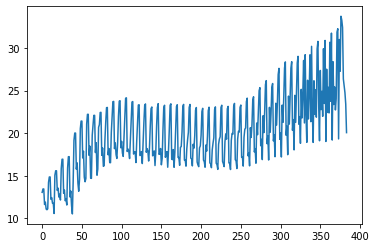

In [30]:
ecodf['Real-World MPG'].plot()

#### How can we improve this?

1. It looks like we're indexing this by integers (the x-axis).  A more helpful view would be years (or dates).
2. From the dataset above, all vehicle types are being plotted (so there are multiple values corresponding to each year).  Try plotting only for the vehicle type `Car SUV`, for example.
3. The plot needs **labels** (axes, legend) and improved formatting (look, size, font).

#### (1) formatting the dates

Let's format the `Model Year` column and set it as our index.

In [31]:
ecodf

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Prelim. 2022,All,All,-,26.35965,23.17949,29.40284,330.81160,377.18480,295.82831,4328.963,272.3535,51.67437
380,Prelim. 2022,Truck,Minivan/Van,-,25.59317,22.10621,29.04996,344.29378,398.02669,303.75842,4557.279,245.0592,56.21571
381,Prelim. 2022,Truck,Truck SUV,-,24.75038,21.90441,27.43990,354.13291,400.54552,319.11989,4534.261,268.1756,50.02365
382,Prelim. 2022,Truck,All Truck,-,23.40912,20.60126,26.09186,375.92690,427.58585,336.95612,4713.739,284.8583,54.37582


In [32]:
pd.to_datetime(ecodf['Model Year'], format='%Y')

ValueError: ignored

Since the most recent data is marked as preliminary, it's a string that isn't being recognized as a year.
We'll have to work around that manually.

In [33]:
'Prelim. 2021'.split()[-1]

'2021'

In [34]:
def f(t):
    if 'Prelim.' in t:
        t = t.split(' ')[-1]
    return t

ecodf['Model Year'] = ecodf['Model Year'].apply(f)
ecodf['Model Year'] = pd.to_datetime(ecodf['Model Year'], format='%Y')

In [35]:
ecodf.set_index('Model Year', inplace=True)
ecodf

,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
Model Year,,,,,,,,,,,,
1975-01-01,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1975-01-01,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
1975-01-01,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
1975-01-01,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
1975-01-01,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,All,All,-,26.35965,23.17949,29.40284,330.81160,377.18480,295.82831,4328.963,272.3535,51.67437
2022-01-01,Truck,Minivan/Van,-,25.59317,22.10621,29.04996,344.29378,398.02669,303.75842,4557.279,245.0592,56.21571
2022-01-01,Truck,Truck SUV,-,24.75038,21.90441,27.43990,354.13291,400.54552,319.11989,4534.261,268.1756,50.02365


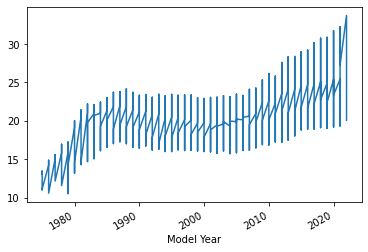

In [36]:
ecodf['Real-World MPG'].plot()

#### (2)

We still have multiple vehicle types being plotted for each year (the large oscillating pattern).
Now check to see where the `Vehicle Type` is equal to `Car SUV` and only plot that data.

This is filtering first by vehicle type for 'Car SUV' and then column 'Real-World MPG'

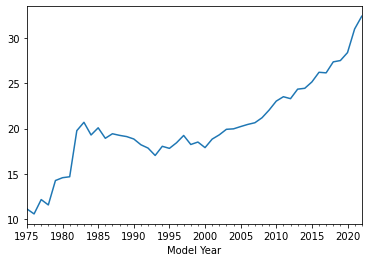

In [37]:
ecodf[ecodf['Vehicle Type']=='Car SUV']['Real-World MPG'].plot()

#### (3)

Note that changing the index automatically applied the index column label as the x-axis label.

But, there's still a lot we can do to improve the plot with more labels and other
visual formatting changes.

First, we'll adjust the image size, add axis labels/legend, and make the line thicker.


Text(0, 0.5, 'Miles Per Gallon')

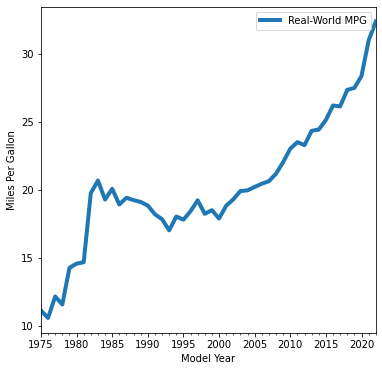

In [38]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[ecodf['Vehicle Type']=='Car SUV']['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles Per Gallon')

We can also change the fontsize and the general look.

https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Text(0.5, 0, 'Year')

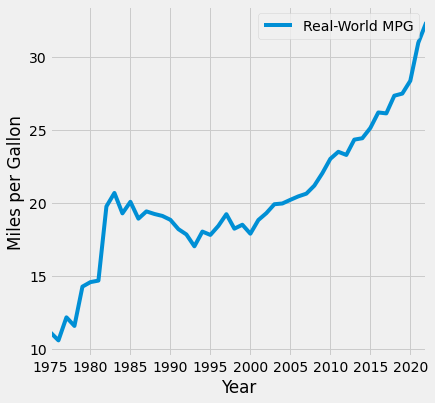

In [39]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[ecodf['Vehicle Type']=='Car SUV']['Real-World MPG'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

The data has a lot of small variation that can make it
harder to see the overall trend.  Let's plot smoothed
data from a rolling average 
by combining the Pandas series functions `.rolling()` and `.mean()`.

Text(0.5, 0, 'Year')

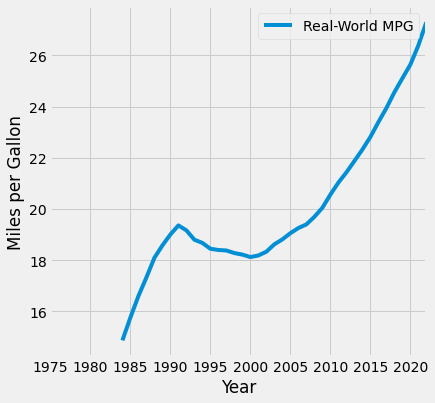

In [40]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ecodf[ecodf['Vehicle Type']=='Car SUV']['Real-World MPG'].rolling(10).mean().plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Miles per Gallon')
plt.xlabel('Year')

## 2. Your turn, the fuel prices dataset

The goal of this portion of the notebook is to construct a correlation between **fuel prices** and **fuel efficiency**.  We've already imported and formatted the fuel efficiency dataset, but you'll be starting from the original .csv for the fuel prices dataset.

To do this consider the following challenge questions:

1. How do you format the fuel price data with a `datetime` index?  It may be helpful to distinguish between monthly values and yearly averages (the yearly averages end in "13" for this dataset).

2. How should you handle missing data in the `Value` column?

3. Do you see a trend in regular unleaded gas prices? (the column is `RUUCUUS` for regular unleaded gas)

4. Find a correlation between the **fuel price** and **fuel efficiency**.  To do this you may want to combine the relevant values from the different dataframes using `pd.merge_asof()` and then use the function `.corr()` on the combined dataframe.

5. Try to plot the **fuel price** and **fuel efficiency** on the same plot, but with different y-axis scales -- do you observe a correlation?

6. Plot **fuel price** and **fuel efficiency** using a rolling average, for example `rolling(5).mean()` on a Pandas series to display a 5 year rolling average.  See above for an example of rolling average.  Plot the rolling averages like you plotted the values in the previous question.

5. (*) Use seaborn's `jointplot()` to plot MPG vs Price to deduce a correlation.  `import seaborn as sns`

### Getting started

First import the data

In [41]:
pricedf = pd.read_csv('MER_T09_04.csv')
pricedf

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes
...,...,...,...,...,...,...
5379,DFONUUS,202208,5.013,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5380,DFONUUS,202209,4.993,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5381,DFONUUS,202210,5.211,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes
5382,DFONUUS,202211,5.255,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes


Checking other dataframe info: number of rows and cols

In [44]:
pricedf.shape

(5384, 6)

In [45]:
pricedf.columns

Index(['MSN', 'YYYYMM', 'Value', 'Column_Order', 'Description', 'Unit'], dtype='object')

Next, do two things:

1. Make a column called `Data Type` and mark it as `AVG` if the year string contains a `13`.
2. For each row that's an `AVG`, format the year string in one way.

Just a silly test of how to get the last two letters of a string

In [46]:
x = str(1000)
x[-2:]

'00'

Now, let's define a function to set `AVG` in the 'Data Type' colum 

In [47]:
def marker_avg(x):
  if str(x)[-2:] == '13':
    return 'AVG'
  else:
    return ''


pricedf['Data Type'] = pricedf['YYYYMM'].apply(marker_avg)

pricedf.head(10)

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type
0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
5,RLUCUUS,195413,0.29,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
6,RLUCUUS,195513,0.291,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
7,RLUCUUS,195613,0.299,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
8,RLUCUUS,195713,0.31,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
9,RLUCUUS,195813,0.304,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG


What type of variable is the value column?

In [48]:
type(pricedf['Value'][0])

str

It is a series of strings, but not all of them correspond to numbers. There are some that says `'Not Available'` or `'Not Applicable'` terms that we need to get rid of. What if we drop those rows? Let's do it

In [49]:
idx2drop = [i for i in pricedf.index if pricedf['Value'].iloc[i] in ['Not Available', 'Not Applicable']]
print(idx2drop)

[24, 25, 26, 27, 28, 29, 30, 31, 32, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454

Let's get rid of those rows and reset index

In [50]:
pricedf.drop(pricedf.index[idx2drop], inplace=True)
pricedf.reset_index()

,index,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type
0,0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
1,1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
2,2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
3,3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
4,4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG
...,...,...,...,...,...,...,...,...
3509,5379,DFONUUS,202208,5.013,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,
3510,5380,DFONUUS,202209,4.993,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,
3511,5381,DFONUUS,202210,5.211,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,
3512,5382,DFONUUS,202211,5.255,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,


Convert string series to float series

In [51]:
pricedf['Value'] = pricedf['Value'].astype(float)

Let's also create a new column with the Year only

In [52]:
pricedf['Year'] = pricedf['YYYYMM'].astype(str).str.slice(stop=4).astype(int)
pricedf

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type,Year
0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1949
1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1950
2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1951
3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1952
4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1953
...,...,...,...,...,...,...,...,...
5379,DFONUUS,202208,5.013,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,,2022
5380,DFONUUS,202209,4.993,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,,2022
5381,DFONUUS,202210,5.211,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,,2022
5382,DFONUUS,202211,5.255,8,On-Highway Diesel Fuel Price,Dollars per Gallon Including Taxes,,2022


Now check to see what all of the `AVG` `Value` numbers look like.

Let's generate a first plot of how these data look like

Text(0.5, 0, 'Sample')

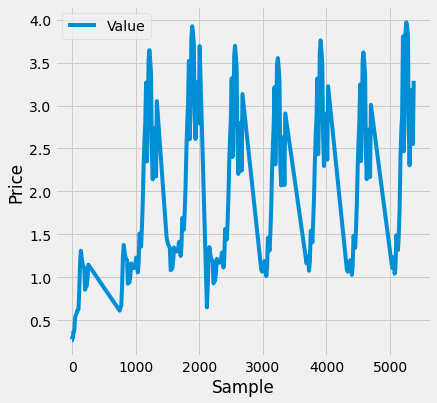

In [53]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

pricedf[pricedf['Data Type'] == 'AVG']['Value'].plot(ax=ax, linewidth=4)

ax.legend()
plt.ylabel('Price')
plt.xlabel('Sample')

It looks noisy, isn't it? Let's try another approach, what if we wanted to see how the price changes as function of the year (averaged). Let's do a scatter plot for this

Text(0.5, 0, 'Year')

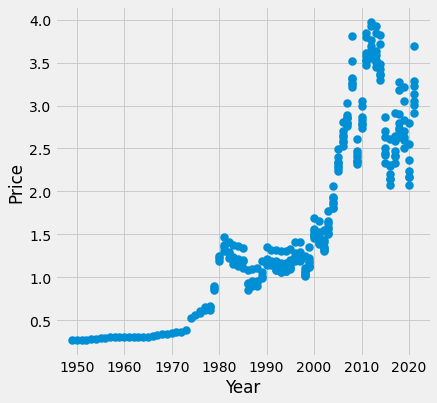

In [54]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

pricedf[pricedf['Data Type'] == 'AVG'].plot.scatter(x='Year', y='Value', ax=ax, linewidth=4)

plt.ylabel('Price')
plt.xlabel('Year')

This is much clearer to understand

For the next step you'll want to 

1. try to convert a number to a float
2. if the convertion doesn't work, then use not-a-number (`np.nan`)

I omitted this step since the dataframe is already filtered....

In [ ]:
try:
    a = 1/0
except:
    print('oops, division by zero')

oops, division by zero


Try using both the fuel average `AVG` and the vehicle `RLUCUUS`

Here's a reminder:

In [55]:
mydf.info()
mydf[
    (mydf['temperature'] == 20)
    &
    (mydf['snowfall'] == 12.5)
]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2019-01-01 to 2019-03-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3 non-null      int64  
 1   snowfall     3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 72.0 bytes


,temperature,snowfall
month,,
2019-01-01,20,12.5


In [56]:
pricedf.info()
pricedf[
    (pricedf['Data Type'] == 'AVG')
    &
    (pricedf['MSN'] == 'RLUCUUS')
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3514 entries, 0 to 5383
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           3514 non-null   object 
 1   YYYYMM        3514 non-null   int64  
 2   Value         3514 non-null   float64
 3   Column_Order  3514 non-null   int64  
 4   Description   3514 non-null   object 
 5   Unit          3514 non-null   object 
 6   Data Type     3514 non-null   object 
 7   Year          3514 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 247.1+ KB


,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type,Year
0,RLUCUUS,194913,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1949
1,RLUCUUS,195013,0.268,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1950
2,RLUCUUS,195113,0.272,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1951
3,RLUCUUS,195213,0.274,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1952
4,RLUCUUS,195313,0.287,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1953
5,RLUCUUS,195413,0.290,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1954
6,RLUCUUS,195513,0.291,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1955
7,RLUCUUS,195613,0.299,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1956
8,RLUCUUS,195713,0.310,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1957
9,RLUCUUS,195813,0.304,1,"Leaded Regular Gasoline, U.S. City Average Ret...",Dollars per Gallon Including Taxes,AVG,1958


 Plot the leaded and unleadded: `RLUCUUS` and `RUUCUUS`

Text(0.5, 0, 'Sample')

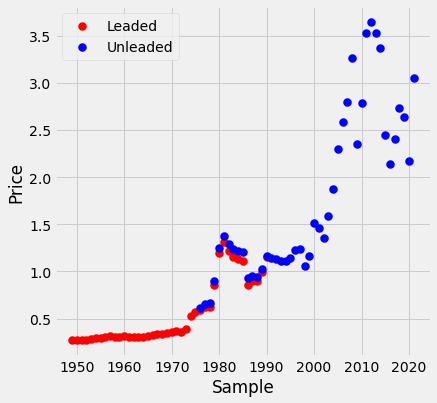

In [57]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

pricedf[(pricedf['Data Type'] == 'AVG') & (pricedf['MSN'] == 'RLUCUUS')].plot.scatter(x='Year', y='Value', ax=ax, linewidth=4, c='red', label='Leaded')
pricedf[(pricedf['Data Type'] == 'AVG') & (pricedf['MSN'] == 'RUUCUUS')].plot.scatter(x='Year', y='Value', ax=ax, linewidth=4, c='blue', label='Unleaded')


ax.legend()
plt.ylabel('Price')
plt.xlabel('Sample')

Make a new data frame for unleaded and set the `Date` as the index

In [58]:
unld_df = pricedf[(pricedf['MSN'] == 'RUUCUUS') & (pricedf['Data Type'] == 'AVG')]

In [60]:
unld_df

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type,Year
748,RUUCUUS,197613,0.614,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1976
761,RUUCUUS,197713,0.656,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1977
774,RUUCUUS,197813,0.670,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1978
787,RUUCUUS,197913,0.903,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1979
800,RUUCUUS,198013,1.245,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1980
813,RUUCUUS,198113,1.378,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1981
826,RUUCUUS,198213,1.296,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1982
839,RUUCUUS,198313,1.241,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1983
852,RUUCUUS,198413,1.212,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1984
865,RUUCUUS,198513,1.202,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1985


Now plot the values and the rolling mean (say every 4 years as an example)

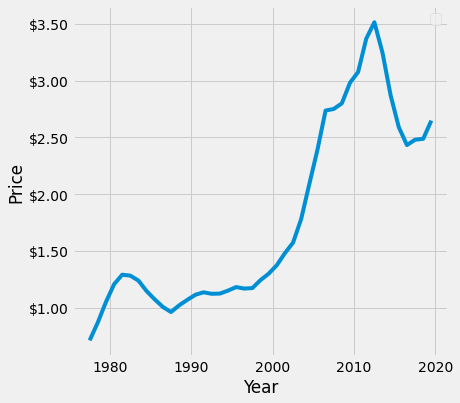

In [67]:
import matplotlib.ticker as mtick

fmt = '$%.2f'
thick = mtick.FormatStrFormatter(fmt)

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(unld_df['Year'].rolling(4).mean(), unld_df['Value'].rolling(4).mean(), linewidth=4)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(thick)
plt.show()

Checking indexing in the `ecodf` dataframe

In [69]:
ecodf.index.year

Int64Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1976, 1976,
            ...
            2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Model Year', length=384)

Make a new data frame for the `Real-World MPG` for `All Car` types:

Let's create a new column `Year` in the `ecodf` dataframe for reference

In [70]:
ecodf['Year'] = ecodf.index.year.astype('int64')
ecodf

,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.),Year
Model Year,,,,,,,,,,,,,
1975-01-01,All,All,1.000000,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-,1975
1975-01-01,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-,1975
1975-01-01,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-,1975
1975-01-01,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-,1975
1975-01-01,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,All,All,-,26.35965,23.17949,29.40284,330.81160,377.18480,295.82831,4328.963,272.3535,51.67437,2022
2022-01-01,Truck,Minivan/Van,-,25.59317,22.10621,29.04996,344.29378,398.02669,303.75842,4557.279,245.0592,56.21571,2022
2022-01-01,Truck,Truck SUV,-,24.75038,21.90441,27.43990,354.13291,400.54552,319.11989,4534.261,268.1756,50.02365,2022


Now, let's just get the columns that matter to us `Year` and `Real-World MPG` for `All Car` Vehicle Type

In [71]:
ecodf_filt = ecodf[ecodf['Vehicle Type'] == 'All Car'][['Year', 'Real-World MPG']]
ecodf_filt

,Year,Real-World MPG
Model Year,,
1975-01-01,1975,13.45483
1976-01-01,1976,14.86139
1977-01-01,1977,15.58566
1978-01-01,1978,16.93760
1979-01-01,1979,17.24016
1980-01-01,1980,20.01181
1981-01-01,1981,21.41607
1982-01-01,1982,22.20740
1983-01-01,1983,22.08496


Now use `pdf.merge_asof`, paying close attention to `left_index`, `right_index`, and `direction`.

This should make a new data frame:

In [72]:
merged_df = pd.merge_asof(unld_df, ecodf_filt, on ='Year')

In [73]:
merged_df

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Data Type,Year,Real-World MPG
0,RUUCUUS,197613,0.614,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1976,14.86139
1,RUUCUUS,197713,0.656,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1977,15.58566
2,RUUCUUS,197813,0.670,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1978,16.93760
3,RUUCUUS,197913,0.903,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1979,17.24016
4,RUUCUUS,198013,1.245,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1980,20.01181
5,RUUCUUS,198113,1.378,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1981,21.41607
6,RUUCUUS,198213,1.296,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1982,22.20740
7,RUUCUUS,198313,1.241,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1983,22.08496
8,RUUCUUS,198413,1.212,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1984,22.42303
9,RUUCUUS,198513,1.202,2,"Unleaded Regular Gasoline, U.S. City Average R...",Dollars per Gallon Including Taxes,AVG,1985,22.98880


Now plot the rolling mean and try to use two axis (a secondary `y`) for the MPG and the price of gas.

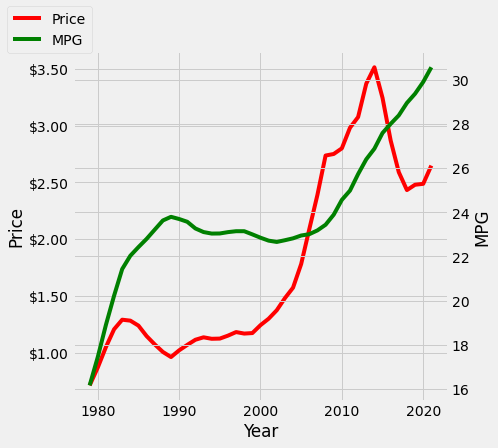

In [76]:
plt.style.use('fivethirtyeight')

fmt = '$%.2f'
thick = mtick.FormatStrFormatter(fmt)

fig, ax1 = plt.subplots(figsize=(6,6))

ax2 = ax1.twinx()

ax1.plot(merged_df['Year'], merged_df['Value'].rolling(4).mean(), c='r', lw='4', label='Price')
ax2.plot(merged_df['Year'], merged_df['Real-World MPG'].rolling(4).mean(), c='g', lw='4', label='MPG')

# merged_df.rolling(4).mean().plot(x='Year', y='Value', ax=ax1, linewidth=4, c='red', label='')
# merged_df.rolling(4).mean().plot(x='Year', y='Real-World MPG', ax=ax2, linewidth=4, c='green', label='')

ax1.yaxis.set_major_formatter(thick)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax2.set_ylabel('MPG')
fig.legend(loc='upper left')

Challenge problem: find the correlation and use `jointplot`

It's easier to use seaborn rathern than matplotlib here, let's do it

In [77]:
import seaborn as sns
import scipy.stats as stats

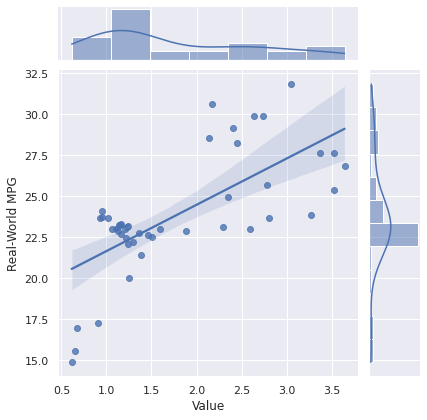

In [86]:
sns.set()
chart = sns.jointplot(data=merged_df, x="Value", y="Real-World MPG", kind='reg')


This is kind of cool, you can see that the fuel price in Dollars (x-axis) is strongly correlated with the fuel efficiency (y-axis)

## What I learned (Consider this if you work with dataframes)
1. If you work with dataframes (Pandas) in Collab or Jupyter, each time you want to test an already filtered dataframe, make a copy of it and work on the copy because if you change data on the original dataframe you might be required to reloaded whenever your changes is no longer desired
2. You can embed seaborn plots within a matplotlib object to better format them, but I skipped that part for now
3. I prefer to work with integer indexes rather than with dates, although this latter is a good practice when working with huge time dataseries. I think that's matter of styles